# Lab-P9:  Plotting and Sorting

In this lab, you will use two new packages: `matplotlib` and `pandas`. Import them below.

In [1]:
import pandas
import matplotlib

import copy

## Segment 1: Plotting Dictionaries

### Task 1.1: Understand how `plot_dict` works
Creating a dictionary will often be the first step towards creating a bar plot in Python. In particular, each dictionary key might correspond to a category (along the x-axis), and each value might correspond to an amount (along the y-axis). To setup plotting in Python, run the following cell:

In [2]:
def plot_dict(d, label="Please Label Me!!!"):
    ax = pandas.Series(d).sort_index().plot.bar(color="black", fontsize=16)
    ax.set_ylabel(label, fontsize=16)
    

Let's try creating a simple dictionary and using it to create a bar plot with the `plot_dict` function:

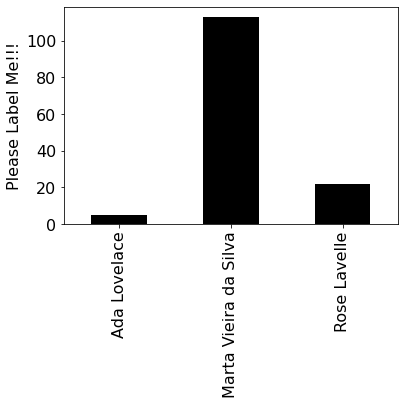

In [3]:
goals = {"Ada Lovelace": 5, "Rose Lavelle": 22, "Marta Vieira da Silva": 113}
plot_dict(goals)


Now, we'll use a different version of the variable `small_movies_data` defined in P8, simply called `movies_data`. If you haven't completed P8, don't worry! The variable has been defined below and you do not need to copy any P8 code over. Run the cell below.

**Important**: We define the variable directly in order to save time and simplify the lab exercises. Do NOT hardcode values of variables storing the dataset in the project. Instead use the appropriate functions to load the data from the corresponding CSV file.

In [29]:
movies_data = [{'title': 'Zoolander',
  'year': 2001,
  'genres': ['Comedy'],
  'duration': 90,
  'directors': ['Ben Stiller'],
  'actors': ['Ben Stiller', 'Owen Wilson'],
  'rating': 6.5},
{'title': 'Tower Heist',
  'year': 2011,
  'genres': ['Action', 'Comedy', 'Crime'],
  'duration': 104,
  'directors': ['Brett Ratner'],
  'actors': ['Ben Stiller', 'Eddie Murphy', 'Casey Affleck'],
  'rating': 6.2},
{'title': 'Shrek 2',
  'year': 2004,
  'genres': ['Animation', 'Adventure', 'Comedy'],
  'duration': 93,
  'directors': ['Andrew Adamson', 'Kelly Asbury'],
  'actors': ['Mike Myers', 'Eddie Murphy'],
  'rating': 7.2},
{'title': 'The Nutty Professor',
  'year': 1996,
  'genres': ['Comedy', 'Romance', 'Sci-Fi'],
  'duration': 95,
  'directors': ['Tom Shadyac'],
  'actors': ['Eddie Murphy', 'Jada Pinkett Smith'],
  'rating': 6.1}]    

### Task 1.2: Map necessary details into a dictionary
As you can see, `movies_data` is a list of dictionaries where each dictionary stores information on a particular movie. Now, use the `plot_dict` function to create a bar plot that compares the duration of each movie in `movies_data`.

Your x-axis should contain the titles of each movie and your y-axis should be the duration. 

You will need to define and create a new dictionary `plot_movies_data` and use it as input to the `plot_dict` function. Do NOT hardcode the value of this new dictionary. Instead, derive the value from the original `movies_data` dictionary by iterating over it.

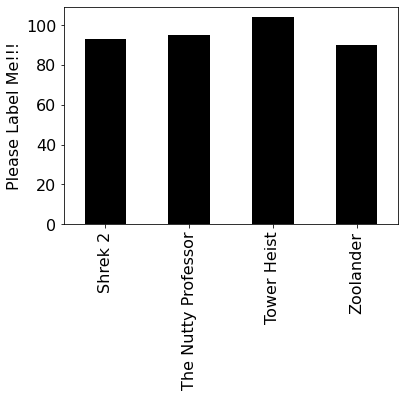

In [48]:
# Your code goes in this cell. 
# Create a new dictionary plot_movies_data with 
# keys as movie titles and values as movie durations. 

# plot_movies_data = {}

# for movie in movies_data:
#     key = movie['title']
#     value = movie['duration']
#     plot_movies_data[key] = value

plot_movies_data = {movie['title'] : movie['duration'] for movie in movies_data}

plot_movies_data


# Pass the newly created dictionary to the plot_dict function

plot_dict(plot_movies_data)


Notice that in the first plot, the y-axis is missing a label; that can be specified with an optional second argument to `plot_dict`. This time, specify "Duration" as the label for the y-axis. Plot the graph again with this new label.

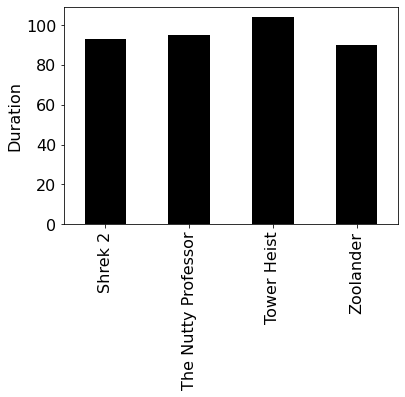

In [36]:
#Your code goes in this cell

plot_dict(plot_movies_data, "Duration")


Your final output should look like this:

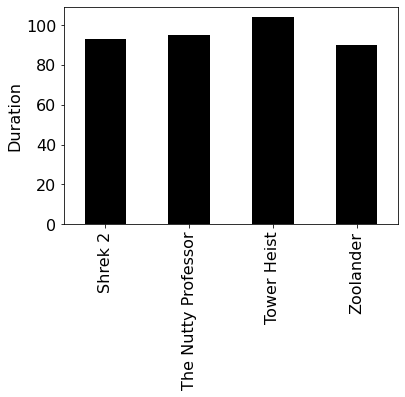

## Segment 2: Creating a Dictionary with Custom Keys

### Task 2.1: Convert years to their decades

Recall in p5, we organized hurricanes by decade.
We are going to use that same idea to create custom keys for a dictionary of frequencies.

First, we are going to write the `year_to_decade` function. Given a year, this function returns a string that represents the decade that year belongs to. Here are some sample calls and the expected output:

- year_to_decade(2003) will return '2001 to 2010'
- year_to_decade(2000) will return '1991 to 2000'

Complete the code below. 

In [37]:
def year_to_decade(year):
    if year % 10 == 0:
        decade_start = year - 9
        decade_end = year
        
    else:
        decade_start = year - (year % 10) + 1
        decade_end = decade_start + 9
        
    return str(decade_start) + " to " + str(decade_end)


In [38]:
#Test your function

print("Expected: 1991 to 2000 \t Actual: ", year_to_decade(2000))
print("Expected: 1841 to 1850 \t Actual: ", year_to_decade(1843))
print("Expected: 2011 to 2020 \t Actual: ", year_to_decade(2013))


Expected: 1991 to 2000 	 Actual:  1991 to 2000
Expected: 1841 to 1850 	 Actual:  1841 to 1850
Expected: 2011 to 2020 	 Actual:  2011 to 2020


### Task 2.2: Create new dictionary with custom keys and values

Create a new dictionary `movies_with_decade` that has the title of each movie in `movies_data` as a key and the decade it was released in as a value. Use the `year_to_decade` function you created in the previous task.

In [9]:
# Your code goes here

# movies_with_decade = {}

# for movie in movies_data:
#     key = movie['title']
#     value = year_to_decade(movie['year'])
    
#     movies_with_decade[key] = value
    
movies_with_decade = {d['title']: year_to_decade(d['year']) for d in movies_data}
movies_with_decade


{'Zoolander': '2001 to 2010',
 'Tower Heist': '2011 to 2020',
 'Shrek 2': '2001 to 2010',
 'The Nutty Professor': '1991 to 2000'}

In [10]:
# Test your implementation

print("Expected: 2001 to 2010 \t Actual: ", movies_with_decade["Shrek 2"])
print("Expected: 2011 to 2020 \t Actual: ", movies_with_decade['Tower Heist'])
print("Expected: 1991 to 2000 \t Actual: ", movies_with_decade['The Nutty Professor'])


Expected: 2001 to 2010 	 Actual:  2001 to 2010
Expected: 2011 to 2020 	 Actual:  2011 to 2020
Expected: 1991 to 2000 	 Actual:  1991 to 2000


## Segment 3: Sorting a Dictionary

### Task 3.1: Sort `plot_movies_data` by title
One way to sort a dictionary is to convert it into a list of tuples, sort the tuples, and then convert the sorted tuples back to a dictionary.

Here's what `plot_movies_data.items()` looks like:
```python
[('Zoolander', 90), ('Tower Heist', 104), ('Shrek 2', 93), ('The Nutty Professor', 95)]
```

Sort the `plot_movies_data` dictionary you defined earlier (Task 1.2), using the `sorted` function.

In [11]:
# Your code here

dict(sorted(plot_movies_data.items()))


{'Shrek 2': 93, 'The Nutty Professor': 95, 'Tower Heist': 104, 'Zoolander': 90}

### Task 3.2: Sort `plot_movies_data` by duration
The tuples were sorted by their first item, which was the key. This time, we'll sort the dictionary by values. i.e. The movies will be ordered in ascending order of their durations.

To sort by values, use a keyword argument to identify a function reference. We can either use `lambda` function or write an extract / get function to specify which field inside the tuple to consider for sorting. Recall that the `lambda` or extract / get function should deal with a single movie tuple.

In [12]:
# Your code here

dict(sorted(plot_movies_data.items(), key = lambda s: s[-1]))


{'Zoolander': 90, 'Shrek 2': 93, 'The Nutty Professor': 95, 'Tower Heist': 104}

## Segement 4: Sorting a List of Dictionaries by any key

Given our `movies_data` list of dictionaries, let's sort it based on different keys. Create a new list `sorted_movies_data` that contains the movies in `movies_data` sorted based on the year of release of each movie, in descending order (starting with the most recent release and ending with the least). Make sure to not modify the original value of `movies_data` in any way. 

In [13]:
# Your code here

movies_data

sorted_movies_data = sorted(movies_data, key = lambda d: d['year'], reverse = True)

sorted_movies_data


[{'title': 'Tower Heist',
  'year': 2011,
  'genres': ['Action', 'Comedy', 'Crime'],
  'duration': 104,
  'directors': ['Brett Ratner'],
  'actors': ['Ben Stiller', 'Eddie Murphy', 'Casey Affleck'],
  'rating': 6.2},
 {'title': 'Shrek 2',
  'year': 2004,
  'genres': ['Animation', 'Adventure', 'Comedy'],
  'duration': 93,
  'directors': ['Andrew Adamson', 'Kelly Asbury'],
  'actors': ['Mike Myers', 'Eddie Murphy'],
  'rating': 7.2},
 {'title': 'Zoolander',
  'year': 2001,
  'genres': ['Comedy'],
  'duration': 90,
  'directors': ['Ben Stiller'],
  'actors': ['Ben Stiller', 'Owen Wilson'],
  'rating': 6.5},
 {'title': 'The Nutty Professor',
  'year': 1996,
  'genres': ['Comedy', 'Romance', 'Sci-Fi'],
  'duration': 95,
  'directors': ['Tom Shadyac'],
  'actors': ['Eddie Murphy', 'Jada Pinkett Smith'],
  'rating': 6.1}]

In [14]:
# Test your implementation

print("Expected: Tower Heist \t Actual: ", sorted_movies_data[0]['title'])
print("Expected: Shrek 2 \t Actual: ", sorted_movies_data[1]['title'])
print("Expected: Zoolander \t Actual: ", sorted_movies_data[2]['title'])


Expected: Tower Heist 	 Actual:  Tower Heist
Expected: Shrek 2 	 Actual:  Shrek 2
Expected: Zoolander 	 Actual:  Zoolander


## Segment 5: Bucketizing

### Task 5.1: Create `movies_by_actor` dictionary

Now, let's make a bucketized dictionary `movies_by_actor` that has the name of each actor mentioned in `movies_data` as a key and a list of movies they featured in as values. By list of movies, we mean a list of dictionaries - each dictionary represents a movie. 

You should be familiar with the steps to write code for this. We recommend that you try that on your own first. If you really need a hint, please see the suggested approach below.

In [42]:
## Your code goes here

movies_by_actor = {}

for movie in movies_data:
    actors = movie['actors']

    for actor in actors:
        
        if actor not in movies_by_actor:
            movies_by_actor[actor] = []

        if actor in movies_by_actor:
            movies_by_actor[actor].append(movie)

movies_by_actor


{'Ben Stiller': [{'title': 'Zoolander',
   'year': 2001,
   'genres': ['Comedy'],
   'duration': 90,
   'directors': ['Ben Stiller'],
   'actors': ['Ben Stiller', 'Owen Wilson'],
   'rating': 6.5},
  {'title': 'Tower Heist',
   'year': 2011,
   'genres': ['Action', 'Comedy', 'Crime'],
   'duration': 104,
   'directors': ['Brett Ratner'],
   'actors': ['Ben Stiller', 'Eddie Murphy', 'Casey Affleck'],
   'rating': 6.2}],
 'Owen Wilson': [{'title': 'Zoolander',
   'year': 2001,
   'genres': ['Comedy'],
   'duration': 90,
   'directors': ['Ben Stiller'],
   'actors': ['Ben Stiller', 'Owen Wilson'],
   'rating': 6.5}],
 'Eddie Murphy': [{'title': 'Tower Heist',
   'year': 2011,
   'genres': ['Action', 'Comedy', 'Crime'],
   'duration': 104,
   'directors': ['Brett Ratner'],
   'actors': ['Ben Stiller', 'Eddie Murphy', 'Casey Affleck'],
   'rating': 6.2},
  {'title': 'Shrek 2',
   'year': 2004,
   'genres': ['Animation', 'Adventure', 'Comedy'],
   'duration': 93,
   'directors': ['Andrew Ada

In [43]:
# Test your implementation

print("Expected: Zoolander   \t Actual: ", movies_by_actor['Ben Stiller'][0]['title'])
print("Expected: Tower Heist \t Actual: ", movies_by_actor['Casey Affleck'][0]['title'])
print("Expected: 3           \t Actual: ", len(movies_by_actor['Eddie Murphy']))


Expected: Zoolander   	 Actual:  Zoolander
Expected: Tower Heist 	 Actual:  Tower Heist
Expected: 3           	 Actual:  3


## Segment 6: Comprehensions

We can write comprehensions on dictionaries to form lists or to form new dictionaries. For example, let's compute the median ratings of the movies in `movies_data`.

### Task 6.1: Write the `median` function

First, write a function to compute the median, and be sure the test code runs correctly. Recall that you implemented such a function in Lab-P6.

In [17]:
def median(items):

    sorted_items = sorted(items)
    length = len(items)

    if length > 0:
        if length % 2 != 0:
            middle = (length - 1) // 2
            median = sorted_items[middle] 
            
        else:
            first_middle = length // 2
            second_middle = (length // 2) - 1
            median = (sorted_items[first_middle] + sorted_items[second_middle]) / 2
    
    return median


In [18]:
# Test your implementation

print("Expected value: 42 Actual value: ", median([44, 40, 45, 38, 42]))
print("Expected value: 18.5 Actual value: ", median([17, 18, 20, 19]))


Expected value: 42 Actual value:  42
Expected value: 18.5 Actual value:  18.5


### Task 6.2: Create a list of ratings using list comprehension
Now that you have the median function working, let's make a list by iterating through a dictionary. Create a list `movie_ratings` containing the rating of each movie in `movies_data`. Then, use the median function to compute the median rating and store the result in a `median_rating` variable.

You must use list comprehension to create the list.

In [45]:
# This cell should contain exactly two lines of code:
# The first line creates the list, and the second will compute the median.
# Solving it using multiple lines of code won't give you practice for list comprehensions.

movie_ratings = sorted([d['rating'] for d in movies_data])

median_rating = median(movie_ratings)

median_rating


6.35

In [46]:
# Test your implementation
print("Expected: [6.1, 6.2, 6.5, 7.2]       \t Actual: ", movie_ratings)
print("Expected: 6.35                       \t Actual: ", median_rating)

Expected: [6.1, 6.2, 6.5, 7.2]       	 Actual:  [6.1, 6.2, 6.5, 7.2]
Expected: 6.35                       	 Actual:  6.35


### Task 6.3: Create a dictionary of actors and their movie ratings using list comprehension
Now, we'll attempt to find the median ratings for each actor. Use the `movies_by_actor` dictionary you created in Task 5.1. Create a dictionary `ratings_by_actor` with the names of the actors as keys and a list of ratings as a value. 

You must use list comprehension to create the list. The list comprehension will be inside a traditional for loop.

In [21]:
ratings_by_actor = {}

for actor in movies_by_actor:
    actor_movies = movies_by_actor[actor]
    #print(actor_movies)
    
    actor_rating = [d['rating'] for d in actor_movies]
    #print(actor_rating)
    
    ratings_by_actor[actor] = actor_rating
    
ratings_by_actor


[{'title': 'Zoolander', 'year': 2001, 'genres': ['Comedy'], 'duration': 90, 'directors': ['Ben Stiller'], 'actors': ['Ben Stiller', 'Owen Wilson'], 'rating': 6.5}, {'title': 'Tower Heist', 'year': 2011, 'genres': ['Action', 'Comedy', 'Crime'], 'duration': 104, 'directors': ['Brett Ratner'], 'actors': ['Ben Stiller', 'Eddie Murphy', 'Casey Affleck'], 'rating': 6.2}]
[{'title': 'Zoolander', 'year': 2001, 'genres': ['Comedy'], 'duration': 90, 'directors': ['Ben Stiller'], 'actors': ['Ben Stiller', 'Owen Wilson'], 'rating': 6.5}]
[{'title': 'Tower Heist', 'year': 2011, 'genres': ['Action', 'Comedy', 'Crime'], 'duration': 104, 'directors': ['Brett Ratner'], 'actors': ['Ben Stiller', 'Eddie Murphy', 'Casey Affleck'], 'rating': 6.2}, {'title': 'Shrek 2', 'year': 2004, 'genres': ['Animation', 'Adventure', 'Comedy'], 'duration': 93, 'directors': ['Andrew Adamson', 'Kelly Asbury'], 'actors': ['Mike Myers', 'Eddie Murphy'], 'rating': 7.2}, {'title': 'The Nutty Professor', 'year': 1996, 'genres': 

{'Ben Stiller': [6.5, 6.2],
 'Owen Wilson': [6.5],
 'Eddie Murphy': [6.2, 7.2, 6.1],
 'Casey Affleck': [6.2],
 'Mike Myers': [7.2],
 'Jada Pinkett Smith': [6.1]}

In [22]:
#Your code here

for actor in movies_by_actor:
    #ratings_by_actor = {k:v for (k,v) in movies_by_actor.items()}
    ratings_by_actor = {k:[d['rating'] for d in v] for (k,v) in movies_by_actor.items()}
    
ratings_by_actor


{'Ben Stiller': [6.5, 6.2],
 'Owen Wilson': [6.5],
 'Eddie Murphy': [6.2, 7.2, 6.1],
 'Casey Affleck': [6.2],
 'Mike Myers': [7.2],
 'Jada Pinkett Smith': [6.1]}

In [23]:
# Rough

two_movies = [{'title': 'Zoolander',
   'year': 2001,
   'genres': ['Comedy'],
   'duration': 90,
   'directors': ['Ben Stiller'],
   'actors': ['Ben Stiller', 'Owen Wilson'],
   'rating': 6.5},
  {'title': 'Tower Heist',
   'year': 2011,
   'genres': ['Action', 'Comedy', 'Crime'],
   'duration': 104,
   'directors': ['Brett Ratner'],
   'actors': ['Ben Stiller', 'Eddie Murphy', 'Casey Affleck'],
   'rating': 6.2}]

#print(two_movies)

two_dict = {d['title']: d['rating'] for d in two_movies}
print(two_dict)

[v for (k,v) in two_dict.items()] # Using dict

[d['genres'] for d in two_movies] # Using list of dict


{'Zoolander': 6.5, 'Tower Heist': 6.2}


[['Comedy'], ['Action', 'Comedy', 'Crime']]

In [24]:
# Test your implementation

print("Expected: [6.5, 6.2]       \t Actual: ", ratings_by_actor['Ben Stiller'])
print("Expected: [6.2, 7.2, 6.1]  \t Actual: ", ratings_by_actor['Eddie Murphy'])


Expected: [6.5, 6.2]       	 Actual:  [6.5, 6.2]
Expected: [6.2, 7.2, 6.1]  	 Actual:  [6.2, 7.2, 6.1]


### Task 6.4: Create a dictionary of medians using dictionary comprehension
Given the dictionary `ratings_by_actor` obtained in Task 6.3, let's make a new dictionary `median_ratings_by_actor` where the key is the actor name and the value is the median. 

You must use dictionary comprehension to build the dictionary in a single statement.

In [25]:
# Your code here

actor_title_dict = {k:[d['title'] for d in v] for (k,v) in movies_by_actor.items()}

median_ratings_by_actor = {k:median(v) for (k,v) in ratings_by_actor.items()}

median_ratings_by_actor

actor_title_dict

{'Ben Stiller': ['Zoolander', 'Tower Heist'],
 'Owen Wilson': ['Zoolander'],
 'Eddie Murphy': ['Tower Heist', 'Shrek 2', 'The Nutty Professor'],
 'Casey Affleck': ['Tower Heist'],
 'Mike Myers': ['Shrek 2'],
 'Jada Pinkett Smith': ['The Nutty Professor']}

In [26]:
# Test your implementation

print("Expected: 6.5  \t Actual: ", median_ratings_by_actor['Owen Wilson'])
print("Expected: 6.2  \t Actual: ", median_ratings_by_actor['Casey Affleck'])
print("Expected: 6.1  \t Actual: ", median_ratings_by_actor['Jada Pinkett Smith'])


Expected: 6.5  	 Actual:  6.5
Expected: 6.2  	 Actual:  6.2
Expected: 6.1  	 Actual:  6.1


### Task 6.5 (Optional) Create `median_ratings_by_actor` in one step using dictionary and list comprehension

Here's an **optional** challenge for you to get more practice on comprehensions, you may choose to skip this task and start the project. 

Let's try to combine Task 6.3 and 6.4 into a single comprehension step. Starting with the `movies_by_actor` dictionary created in Task 5.1, create a dictionary `median_ratings_by_actor2` that contains the names of each actor as keys and the median rating of their movies as values. 

You must do this in a single statement that uses both dictionary and list comprehension. You should only use the `movies_by_actor` dictionary and no other previously created data structures.

**Hint**: You will need to pass the result of a list comprehension as an argument to the median function and use dictionary comprehension to build the dictionary.

Compare your answer to the value you got in Task 6.4.

In [27]:
##Only complete the line below, do not add any other lines of code.

median_ratings_by_actor2 = {k:median([d['rating'] for d in v]) for (k,v) in movies_by_actor.items()}

median_ratings_by_actor2


{'Ben Stiller': 6.35,
 'Owen Wilson': 6.5,
 'Eddie Murphy': 6.2,
 'Casey Affleck': 6.2,
 'Mike Myers': 7.2,
 'Jada Pinkett Smith': 6.1}

## Great work! You are now ready to start P9.